In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_dir='/kaggle/input/siim-isic-melanoma-classification/train.csv'
test_dir='/kaggle/input/siim-isic-melanoma-classification/test.csv'
train_dataframe=pd.read_csv(training_dir)
test_dataframe=pd.read_csv(test_dir)
train_dataframe.head(7)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0
6,ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0


In [3]:
test=pd.read_csv(test_dir)

In [4]:
train_dataframe['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [5]:
#percentage of people not suffering from Melanoma are:
print('Non-Melonoma patients are :',(32542/(32542+584)*100))
print('Melonoma patients are : ',(584/(32542+584)*100))

Non-Melonoma patients are : 98.23703435367989
Melonoma patients are :  1.762965646320111


As we saw above we have 33126 training_dataset and in which there is only 584 having label 1 or suffered from Melanoma. 
So,here "data imblance" problem arises.
only 1.7% of people suffered from meloma in the given dataset

In [6]:
#Format in which we need to submit the submission file.
submission=pd.read_csv('/kaggle/input/siim-isic-melanoma-classification/sample_submission.csv')
submission.head(10)

,image_name,target
0,ISIC_0052060,0
1,ISIC_0052349,0
2,ISIC_0058510,0
3,ISIC_0073313,0
4,ISIC_0073502,0
5,ISIC_0074618,0
6,ISIC_0076801,0
7,ISIC_0077586,0
8,ISIC_0082004,0
9,ISIC_0082785,0


In [7]:
train_dataframe['sex'].value_counts() 
#It shows,there is no gender biasness in this dataset,both are approximately equal

male      17080
female    15981
Name: sex, dtype: int64

In [8]:
train_dataframe.describe()

,age_approx,target
count,33058.000000,33126.000000
mean,48.870016,0.017630
std,14.380360,0.131603
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


***Mean of age is approx 49,and 75% of dataset lies under 60 ,
and 1remaining upto 90 so there are not much more outliers in the dataset w.r.t age***

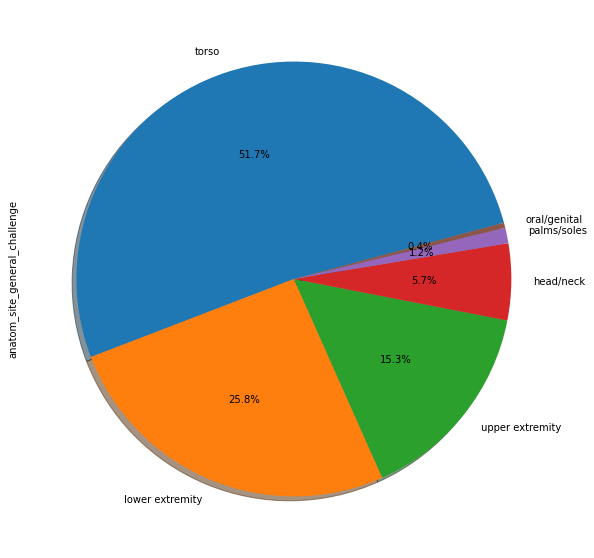

In [9]:
#'anatom_site_general_challenge' is the location of cancer,so it is very important feature.

labels=train_dataframe['anatom_site_general_challenge'].value_counts()
values=train_dataframe['anatom_site_general_challenge'].value_counts().values
# i will try to plot it using graph,i think pie chart is good 
fig=labels.plot.pie(y=values,figsize=(10,10),autopct='%1.1f%%',startangle=15, shadow = True)


**If we look at the graph carefully,
more than 51% of data lies under "torso"
it means half of the person having cancer on "torso"**

In [10]:
train_dataframe.drop(train_dataframe.loc[train_dataframe['diagnosis']=='unknown'].index, inplace=True)

In [11]:
#Another feature is diagnosis
#I try to remove the "unknown" valued rows.

diag_index=train_dataframe['diagnosis'].value_counts()
diag_labels=train_dataframe['diagnosis'].value_counts().values
diag_index,diag_labels

(nevus                                 5193
 melanoma                               584
 seborrheic keratosis                   135
 lentigo NOS                             44
 lichenoid keratosis                     37
 solar lentigo                            7
 cafe-au-lait macule                      1
 atypical melanocytic proliferation       1
 Name: diagnosis, dtype: int64,
 array([5193,  584,  135,   44,   37,    7,    1,    1]))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4868da9150>],
      dtype=object)

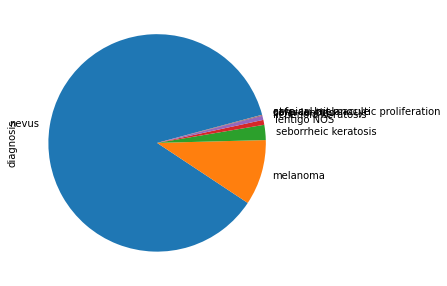

In [12]:
diag_index.plot.pie(y=diag_labels,subplots=True,figsize=(7,5), startangle=15)

** 82% data are unknown  and 16% are navus**

In [13]:
df=train_dataframe.drop(['image_name','patient_id','sex','age_approx','anatom_site_general_challenge','target'],axis=1)

In [14]:
df

,diagnosis,benign_malignant
2,nevus,benign
12,nevus,benign
26,nevus,benign
27,nevus,benign
28,nevus,benign
...,...,...
33108,nevus,benign
33113,nevus,benign
33117,melanoma,malignant
33118,nevus,benign


In [15]:
# if we will try to figure out that in which category of diagnosis ,most of the people are maligant or not maligant
pd.crosstab(df['diagnosis'].values,df['benign_malignant'])

benign_malignant,benign,malignant
row_0,,
atypical melanocytic proliferation,1,0
cafe-au-lait macule,1,0
lentigo NOS,44,0
lichenoid keratosis,37,0
melanoma,0,584
nevus,5193,0
seborrheic keratosis,135,0
solar lentigo,7,0


**benign cases are diagnosed as nevus
**and those diagnosed as "melanoma" are maligant**

In [16]:
benign_data=train_dataframe[train_dataframe['target']==0].sample(1500) #i have taken a small sample of benign_data
maligant_data=train_dataframe[train_dataframe['target']==1]
train=pd.concat([benign_data,maligant_data])
train=train.reset_index()

In [17]:
train

,index,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,14591,ISIC_4471567,IP_2507276,male,70.0,torso,nevus,benign,0
1,18038,ISIC_5497432,IP_8937782,male,35.0,upper extremity,nevus,benign,0
2,6030,ISIC_1904980,IP_1658035,male,40.0,torso,nevus,benign,0
3,1343,ISIC_0507002,IP_2411134,female,35.0,torso,nevus,benign,0
4,4118,ISIC_1344155,IP_7442385,male,40.0,torso,nevus,benign,0
...,...,...,...,...,...,...,...,...,...
2079,32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1
2080,33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1
2081,33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1
2082,33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1


In [18]:
train_dir='/kaggle/input/siim-isic-melanoma-classification/jpeg/train/'
test_dir='/kaggle/input/siim-isic-melanoma-classification/jpeg/test/'
data=[]
labels=[]
for i in range(train.shape[0]):
    data.append(train_dir+train['image_name'].iloc[i]+'.jpg')
    labels.append(train['target'].iloc[i])
df=pd.DataFrame(data)
df.columns=['images']
df['target']=labels

In [19]:
train.shape,df.shape

((2084, 9), (2084, 2))

In [20]:
# ../input/siim-isic-melanoma-classification/jpeg/train

In [21]:
test_data=[]
for i in range(test.shape[0]):
    test_data.append(test_dir + test['image_name'].iloc[i]+'.jpg')
df_test=pd.DataFrame(test_data)
df_test.columns=['images']

In [22]:
df_test

,images
0,/kaggle/input/siim-isic-melanoma-classificatio...
1,/kaggle/input/siim-isic-melanoma-classificatio...
2,/kaggle/input/siim-isic-melanoma-classificatio...
3,/kaggle/input/siim-isic-melanoma-classificatio...
4,/kaggle/input/siim-isic-melanoma-classificatio...
...,...
10977,/kaggle/input/siim-isic-melanoma-classificatio...
10978,/kaggle/input/siim-isic-melanoma-classificatio...
10979,/kaggle/input/siim-isic-melanoma-classificatio...
10980,/kaggle/input/siim-isic-melanoma-classificatio...


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(df['images'],df['target'],test_size=0.2,random_state=42)

train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})

In [24]:
train_gen

,image_dir,target
1917,/kaggle/input/siim-isic-melanoma-classificatio...,1
1827,/kaggle/input/siim-isic-melanoma-classificatio...,1
352,/kaggle/input/siim-isic-melanoma-classificatio...,0
91,/kaggle/input/siim-isic-melanoma-classificatio...,0
1868,/kaggle/input/siim-isic-melanoma-classificatio...,1
...,...,...
1638,/kaggle/input/siim-isic-melanoma-classificatio...,1
1095,/kaggle/input/siim-isic-melanoma-classificatio...,0
1130,/kaggle/input/siim-isic-melanoma-classificatio...,0
1294,/kaggle/input/siim-isic-melanoma-classificatio...,0


In [25]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_gen,
    x_col='image_dir',
    y_col='target',
    target_size=(256, 256),
    batch_size=8,
    shuffle=True,
    class_mode='raw')

validation_generator = val_datagen.flow_from_dataframe(
    val_gen,
    x_col='image_dir',
    y_col='target',
    target_size=(256, 256),
    shuffle=False,
    batch_size=8,
    class_mode='raw')

Found 1667 validated image filenames.
Found 417 validated image filenames.


In [26]:
train_gen.shape,val_gen.shape

((1667, 2), (417, 2))

In [27]:
#from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.metrics import AUC
from keras.activations import sigmoid
from keras.optimizers import SGD, Adam, Adamax
from keras import Model

In [28]:
from tensorflow.keras.applications import EfficientNetB0
model=EfficientNetB0(weights='imagenet',include_top=False,drop_connect_rate=0.4,input_shape=(256, 256, 3))


16711680/16705208 [==============================] - 0s 0us/step


In [29]:
x = layers.Flatten()(model.output)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(model.input, output)

In [30]:
pip install focal-loss

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
import keras
from focal_loss import BinaryFocalLoss
from keras.metrics import AUC
opt = keras.optimizers.Adam(lr = 1e-5)
# model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'],optimizer=opt)
model.compile(loss=BinaryFocalLoss(gamma=2), metrics=['AUC'],optimizer=opt)

In [32]:
nb_epochs = 25
batch_size=8
nb_train_steps = train_gen.shape[0]//batch_size
nb_val_steps=val_gen.shape[0]//batch_size
print("Number of training and validation steps: {} and {}".format(nb_train_steps,nb_val_steps))

Number of training and validation steps: 208 and 52


In [33]:
#CallBacks Function
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
early_stop=EarlyStopping(monitor="val_loss",
                         patience=10,
                         mode="auto",)
Learning_rate_reduction=ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.5,min_lr=0.001)

callbacks=[early_stop,Learning_rate_reduction]

In [34]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_steps,
    epochs=nb_epochs,
    validation_data=validation_generator,
    callbacks=callbacks,
    validation_steps=nb_val_steps)

# history = model.fit_generator(train_generator,validation_data = validation_generator,epochs = 20, verbose = 1,callbacks=callbacks)

Epoch 1/25
208/208 [==============================] - 173s 834ms/step - loss: 0.2670 - auc: 0.6299 - val_loss: 0.2763 - val_auc: 0.4682
Epoch 2/25
208/208 [==============================] - 143s 688ms/step - loss: 0.2212 - auc: 0.7183 - val_loss: 0.1739 - val_auc: 0.5868
Epoch 3/25
208/208 [==============================] - 146s 704ms/step - loss: 0.2073 - auc: 0.7590 - val_loss: 0.2012 - val_auc: 0.6291
Epoch 4/25
208/208 [==============================] - 144s 693ms/step - loss: 0.1585 - auc: 0.8202 - val_loss: 0.1800 - val_auc: 0.7543
Epoch 5/25
208/208 [==============================] - 145s 695ms/step - loss: 0.1611 - auc: 0.8243 - val_loss: 0.2615 - val_auc: 0.6983
Epoch 6/25
208/208 [==============================] - 145s 698ms/step - loss: 0.1628 - auc: 0.8351 - val_loss: 0.1739 - val_auc: 0.7617
Epoch 7/25
208/208 [==============================] - 145s 695ms/step - loss: 0.1534 - auc: 0.8371 - val_loss: 0.1802 - val_auc: 0.6720
Epoch 8/25
208/208 [============================

In [39]:
import cv2
target=[]
for path in df_test['images']:
    img=cv2.imread(str(path))
    img = cv2.resize(img, (256,256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    img=np.reshape(img,(1,256,256,3))
    prediction=model.predict(img)
    target.append(prediction[0][0])

submission['target']=target

KeyboardInterrupt: 

In [ ]:
submission.to_csv('submission.csv', index=False)

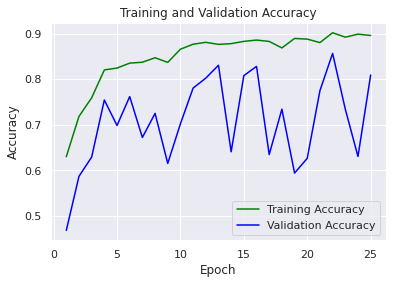

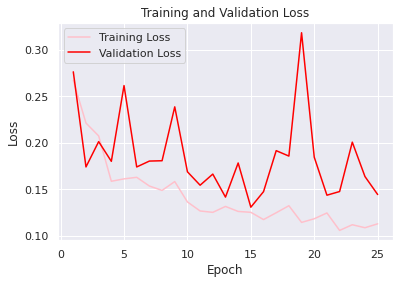

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['auc']
val_acc = hist.history['val_auc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
import pickle
Pkl_Filename = "Pickle_RL_Model.pkl"
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

TypeError: can't pickle _thread.RLock objects